# Part II - Usage of Ford GoBike System Data
## by Elaine Acaba Torres

## Investigation Overview

In this exploration, I wanted to investigate the Ford GoBike System Data. This dataset provided columns that I could make some codes to extract the date, minutes, hour, and member age. I wanted to focus on using these columns to answer what are the factors influencing the bike rides. 


## Dataset Overview
The original dataset had 183412 bike rides and 16 columns. In order to start the exploration, I had to assess and clean the data, creating a dataframe with the final columns to explore. This new dataset called gobike_archive1 contains columns like, member gender, member age, user type, day, month, start hour, period day, start weekday num, start weekday char, start time type to help with the exploration. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_clean = pd.read_csv('gobike_archive1_FordGoBike2019')

df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 17 columns):
duration_sec          183412 non-null int64
start_time            183412 non-null object
end_time              183412 non-null object
user_type             183412 non-null object
member_birth_year     175147 non-null float64
member_gender         175147 non-null object
duration_min          183412 non-null float64
duration_hr           183412 non-null float64
start_dt              183412 non-null object
end_date              183412 non-null object
day                   183412 non-null int64
month                 183412 non-null int64
start_hour            183412 non-null int64
period_day            183412 non-null object
start_weekday_num     183412 non-null int64
start_weekday_char    183412 non-null object
start_time_type       183412 non-null object
dtypes: float64(3), int64(5), object(9)
memory usage: 23.8+ MB


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Visualization

> Write a comment about your visualization here. The visualization should be in the next cell, as a sub-slide type. Make sure your visualizations are polished!


> **Rubric Tip**: Provide at least 3 **polished** visualizations to convey key insights. The total number of visualizations in the slideshow shoould be less than 50% of the number of visualizations in the exploratory analysis. For example, if the exploratory analysis (Part I) has 18 visualizations, the slideshow can have (3 - 8) visualizations. 


> **Rubric Tip**: Each visualization in the slideshow is associated with **descriptive comments** that accurately depict their purpose and your observation. 


> **Rubric Tip**: All plots in the slideshow are appropriate, meaning the plot type, encodings, and transformations are suitable to the underlying data. 

> **Rubric Tip**: All plots in the slideshow are polished, meaning all plots have a title, labeled x/y axes (with units), x/y ticks, and legends. 

## Introduction 
We're going to investigate the most popular times for rides to use the service. From there, we can dig deeper into investigating what are the user types using the service and what is the member gender as well. Through these variables, we can identify as well who has the longest trips from genders and how the customers are using the bikes.

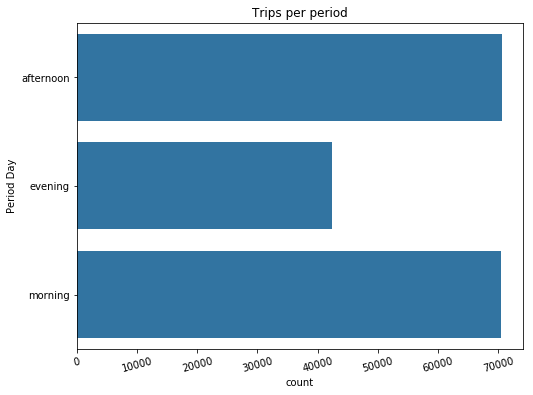

In [3]:
# Whats the most popular period of the day for riders?
base_color = sb.color_palette()[0]

plt.figure(figsize = [8,6])
sb.countplot(data = df_clean, y = 'period_day', color = base_color)
plt.xticks(rotation = 15)
plt.ylabel('Period Day')
plt.title('Trips per period');

- Morning and afternoons are the most popular trip periods with more than 7000 riders for each  of those period. 
- We can see that during the evening, we have approximately 4200 riders. 

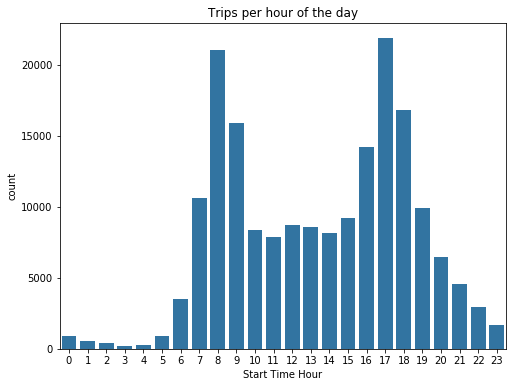

In [4]:
plt.figure(figsize = [8,6])
sb.countplot(data= df_clean, x='start_hour', color=base_color)
plt.xlabel('Start Time Hour')
plt.title('Trips per hour of the day');

- Between the hours 8h - 10h and 17h - 19h we can see an approximate of 2000 riders.
- Slowest time are in the very early morning and in the evenings. 

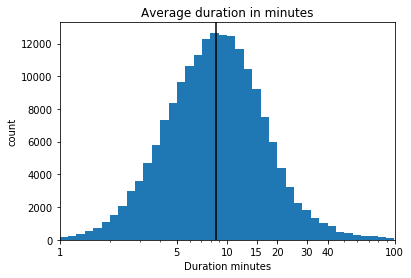

In [5]:
# log scale plot to get the average duration in minutes
log_binsize = 0.05
bins = 10 ** np.arange(0, np.log10(df_clean['duration_min'].max()) + log_binsize, log_binsize)

plt.hist(data = df_clean, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks([1, 5, 10, 15, 20, 30, 40, 100], [1, 5, 10, 15, 20, 30, 40, 100])
plt.xlim((1, 100))
plt.xlabel('Duration minutes')
plt.ylabel('count')
plt.title('Average duration in minutes')
plt.axvline(x = df_clean.duration_min.median(), color = 'black');

- The riders uses the bikes between 1 and 100 minutes approximately.
- The average duration in minutes for a rider is approximately 10 minutes.
- This could be due to commuting. People leaving to work or after work. 


## (Visualization 2)

> You should have at least three visualizations in your presentation,
but feel free to add more if you'd like!

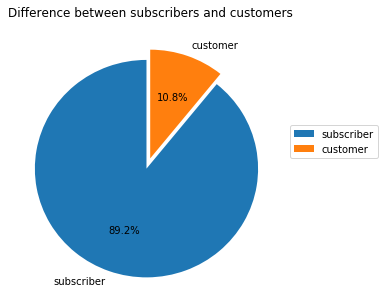

In [6]:
# Difference between subscribers and customers
subscriber = len(df_clean[df_clean['user_type'] == 'Subscriber'])
customer = len(df_clean[df_clean['user_type'] != 'Subscriber'])

fig = plt.figure(figsize = (5, 5))
x_labels = ['subscriber', 'customer']
y = [subscriber, customer]
explode = (0.1, 0)
plt.pie(y, labels = x_labels, explode = explode, startangle=90, autopct='%1.1f%%')
plt.legend (labels = x_labels, loc = (1, 0.5))
plt.title('Difference between subscribers and customers');

- This service has 89.2% subscribers and only 10.8% customers.
- It makes sense that those who frequently use the bikes would tend to subscribe to get easy access maybe to payment and/or information, or to get a membership deal. 


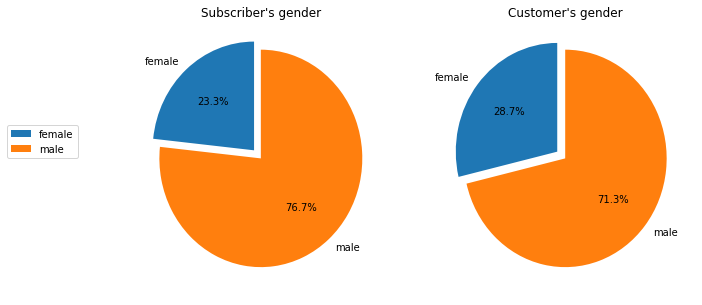

In [7]:
# Whats the gender differences between subscribers and customers?
# Gender in subscriber's users
plt.figure(figsize=[10,5])

plt.subplot(1, 2, 1)
female_sub = len(df_clean[(df_clean['user_type'] == 'Subscriber') & (df_clean['member_gender'] == 'Female')])
male_sub = len(df_clean[(df_clean['user_type'] == 'Subscriber') & (df_clean['member_gender'] == 'Male')])

x_labels = ['female', 'male']
y = [female_sub, male_sub]
explode = (0.1, 0)
plt.pie(y, labels = x_labels, explode = explode, startangle=90, autopct='%1.1f%%')
plt.legend (labels = x_labels, loc = (-0.5, 0.5))
plt.title('Subscriber\'s gender');

# Gender in customer's users
plt.subplot(1, 2, 2)
female_con = len(df_clean[(df_clean['user_type'] == 'Customer') & (df_clean['member_gender'] == 'Female')])
male_con = len(df_clean[(df_clean['user_type'] == 'Customer') & (df_clean['member_gender'] == 'Male')])

x_labels = ['female', 'male']
y = [female_con, male_con]
explode = (0.1, 0)
plt.pie(y, labels = x_labels, explode = explode, startangle=90, autopct='%1.1f%%')
plt.title('Customer\'s gender');

- For each user type, males are the dominant type of gender using the services with more than 70%. 
- Females having less than 30% for each user type. 
- From the last two plots, we can see who is our member gender focus. 

## (Visualization 3)



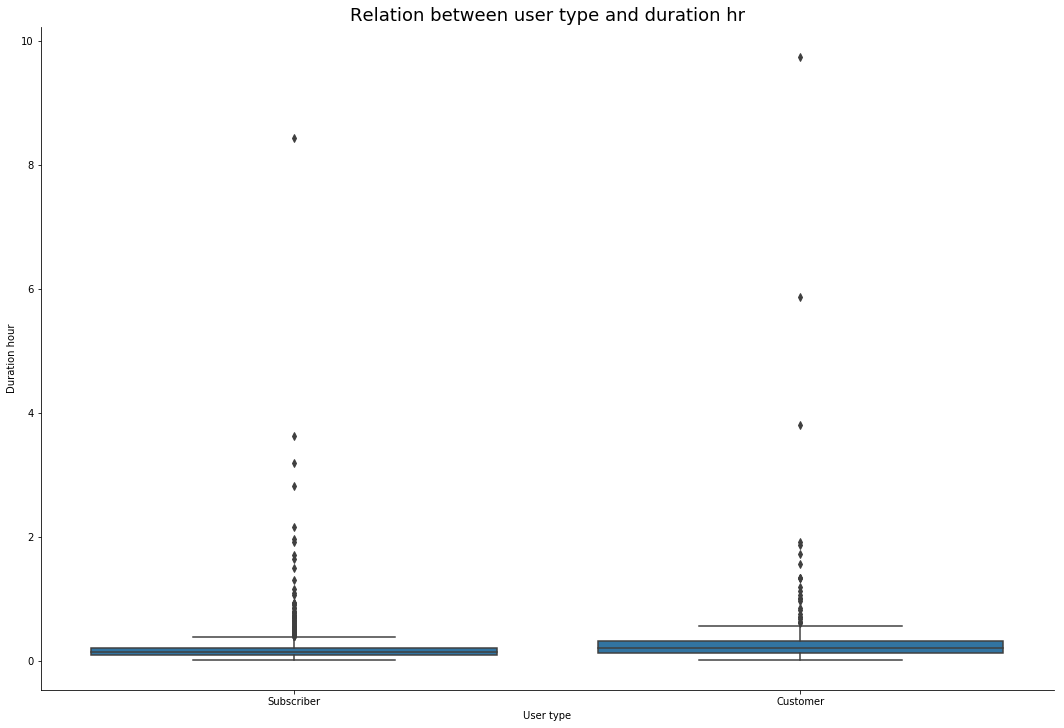

In [8]:
# Whats the relation between user type and duration in hour spent on the bike?
np.random.seed(2018)
samples = np.random.choice(df_clean.shape[0], 2000, replace = False)
bike_clean_samp = df_clean.reindex(samples);

def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [0.5, 0.5])
g = sb.PairGrid(data = bike_clean_samp, y_vars = 'duration_hr', x_vars = 'user_type', size = 10, aspect = 1.5)
g.map(boxgrid)

plt.xlabel('User type')
plt.ylabel('Duration hour')
plt.title('Relation between user type and duration hr', fontsize= 18);

- Customers spend more time using the bikes compared to subscribers.
- This makes sense since subscribers use the services mostly for commuting. 

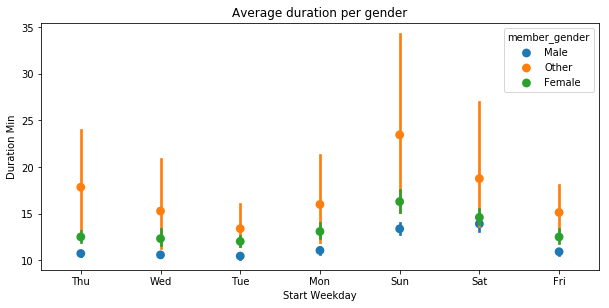

In [9]:
# Whats the average duration per gender and day of week?
plt.figure(figsize=[10,10])

plt.subplot(2, 1, 1)
sb.pointplot(data = df_clean, x = 'start_weekday_char', y = 'duration_min', hue = 'member_gender', linestyles = "")
plt.xlabel('Start Weekday')
plt.ylabel('Duration Min')
plt.title('Average duration per gender');


- Females spend more time using the services of the bike per minute compared to males.
- Only Saturdays, we can note that both genders spend approximately the same time. However, there's a slight difference between genders on other days of the week. 

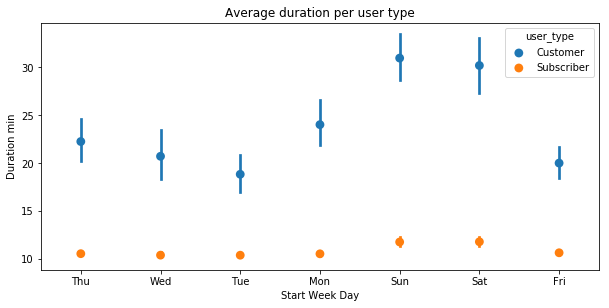

In [10]:
# Whats the average duration per user type and day of week?
plt.figure(figsize=[10,10])

plt.subplot(2, 1, 1)
sb.pointplot(data = df_clean, x = 'start_weekday_char', y = 'duration_min', hue = 'user_type', linestyles = "")
plt.xlabel('Start Week Day')
plt.ylabel('Duration min')
plt.title('Average duration per user type');

- Customers use the bike services over the weekend, with approximately 30 minutes and more, compared to subscribers.
- We can observe the duration in minutes the subscribers spend on the bike per day. Approximately, 10 minutes. 

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 429726 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
